## Boston Housing Data

This is a notebook to explore the elements that **impact the housing prices in Boston, MA**. This data set is taken from [Kaggle](https://www.kaggle.com/datasets/altavish/boston-housing-dataset).

The goal of the notebook is to practice linear regression and understand all of the elements necessary to go through when creating a model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import scipy.stats as stats

#### **Get an idea of what the data looks like**

Here's a list of the column names and their meanings:
- CRIM - per capita crime rate by town

- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS - proportion of non-retail business acres per town.

- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

- NOX - nitric oxides concentration (parts per 10 million)

- RM - average number of rooms per dwelling

- AGE - proportion of owner-occupied units built prior to 1940

- DIS - weighted distances to five Boston employment centres

- RAD - index of accessibility to radial highways

- TAX - full-value property-tax rate per $10,000

- PTRATIO - pupil-teacher ratio by town

- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT - % lower status of the population

- MEDV - Median value of owner-occupied homes in $1000's

In [2]:
housing = pd.read_csv('HousingData.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


#### **Let's look at the percentage missing**

What this will do is help us determine if we should drop any null values if there is a high # of missing.

In [3]:
pct_missing = housing.isna().sum()/len(housing)
pct_missing

# small percentages of missing data

CRIM       0.039526
ZN         0.039526
INDUS      0.039526
CHAS       0.039526
NOX        0.000000
RM         0.000000
AGE        0.039526
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.039526
MEDV       0.000000
dtype: float64

### **Creating training, validation and testing data**

In order to create a predictive model, we need to break the data into three subsets; training, validation and testing subsets.

We use the training dataset to understand the patterns and relationships the data has.

The validation data set is for evaluating the trained model. We can assess model performance and fine tune the parameters. At this stage we can see how well the model is learning and adapting, allowing for adjustments and optimizations to be made to the model's parameters or hyperparameters.

Testing is the unseen dataset. This is at the very end, when we are ready to have an unbiased model evaluation.

#### **Function for creating training, validation and testing dataset**

In [4]:
def train_validate_test_split(df, train_percent=.7, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [5]:
train, validate, test = train_validate_test_split(housing)

In [6]:
# model will not train on null values
train = train.dropna()

In [7]:
# model will not train on null values
validate = validate.dropna()

### **Getting a high level look at what variables may have a relationship, using the training dataset**

We'll use this to get started on investigating.

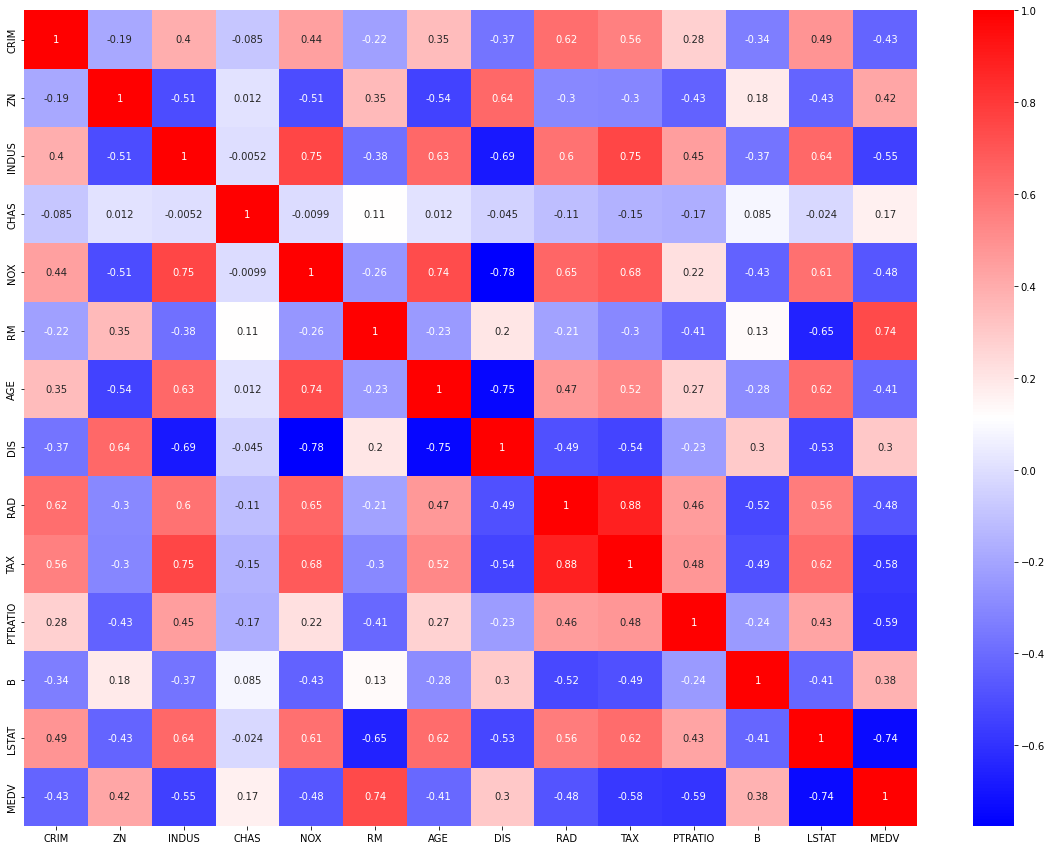

In [8]:
matrix = train.corr()

fig, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(matrix, annot=True, ax=ax, cmap='bwr')
plt.show()

### **Visual representation of what variables may have a relationship in the training dataset**

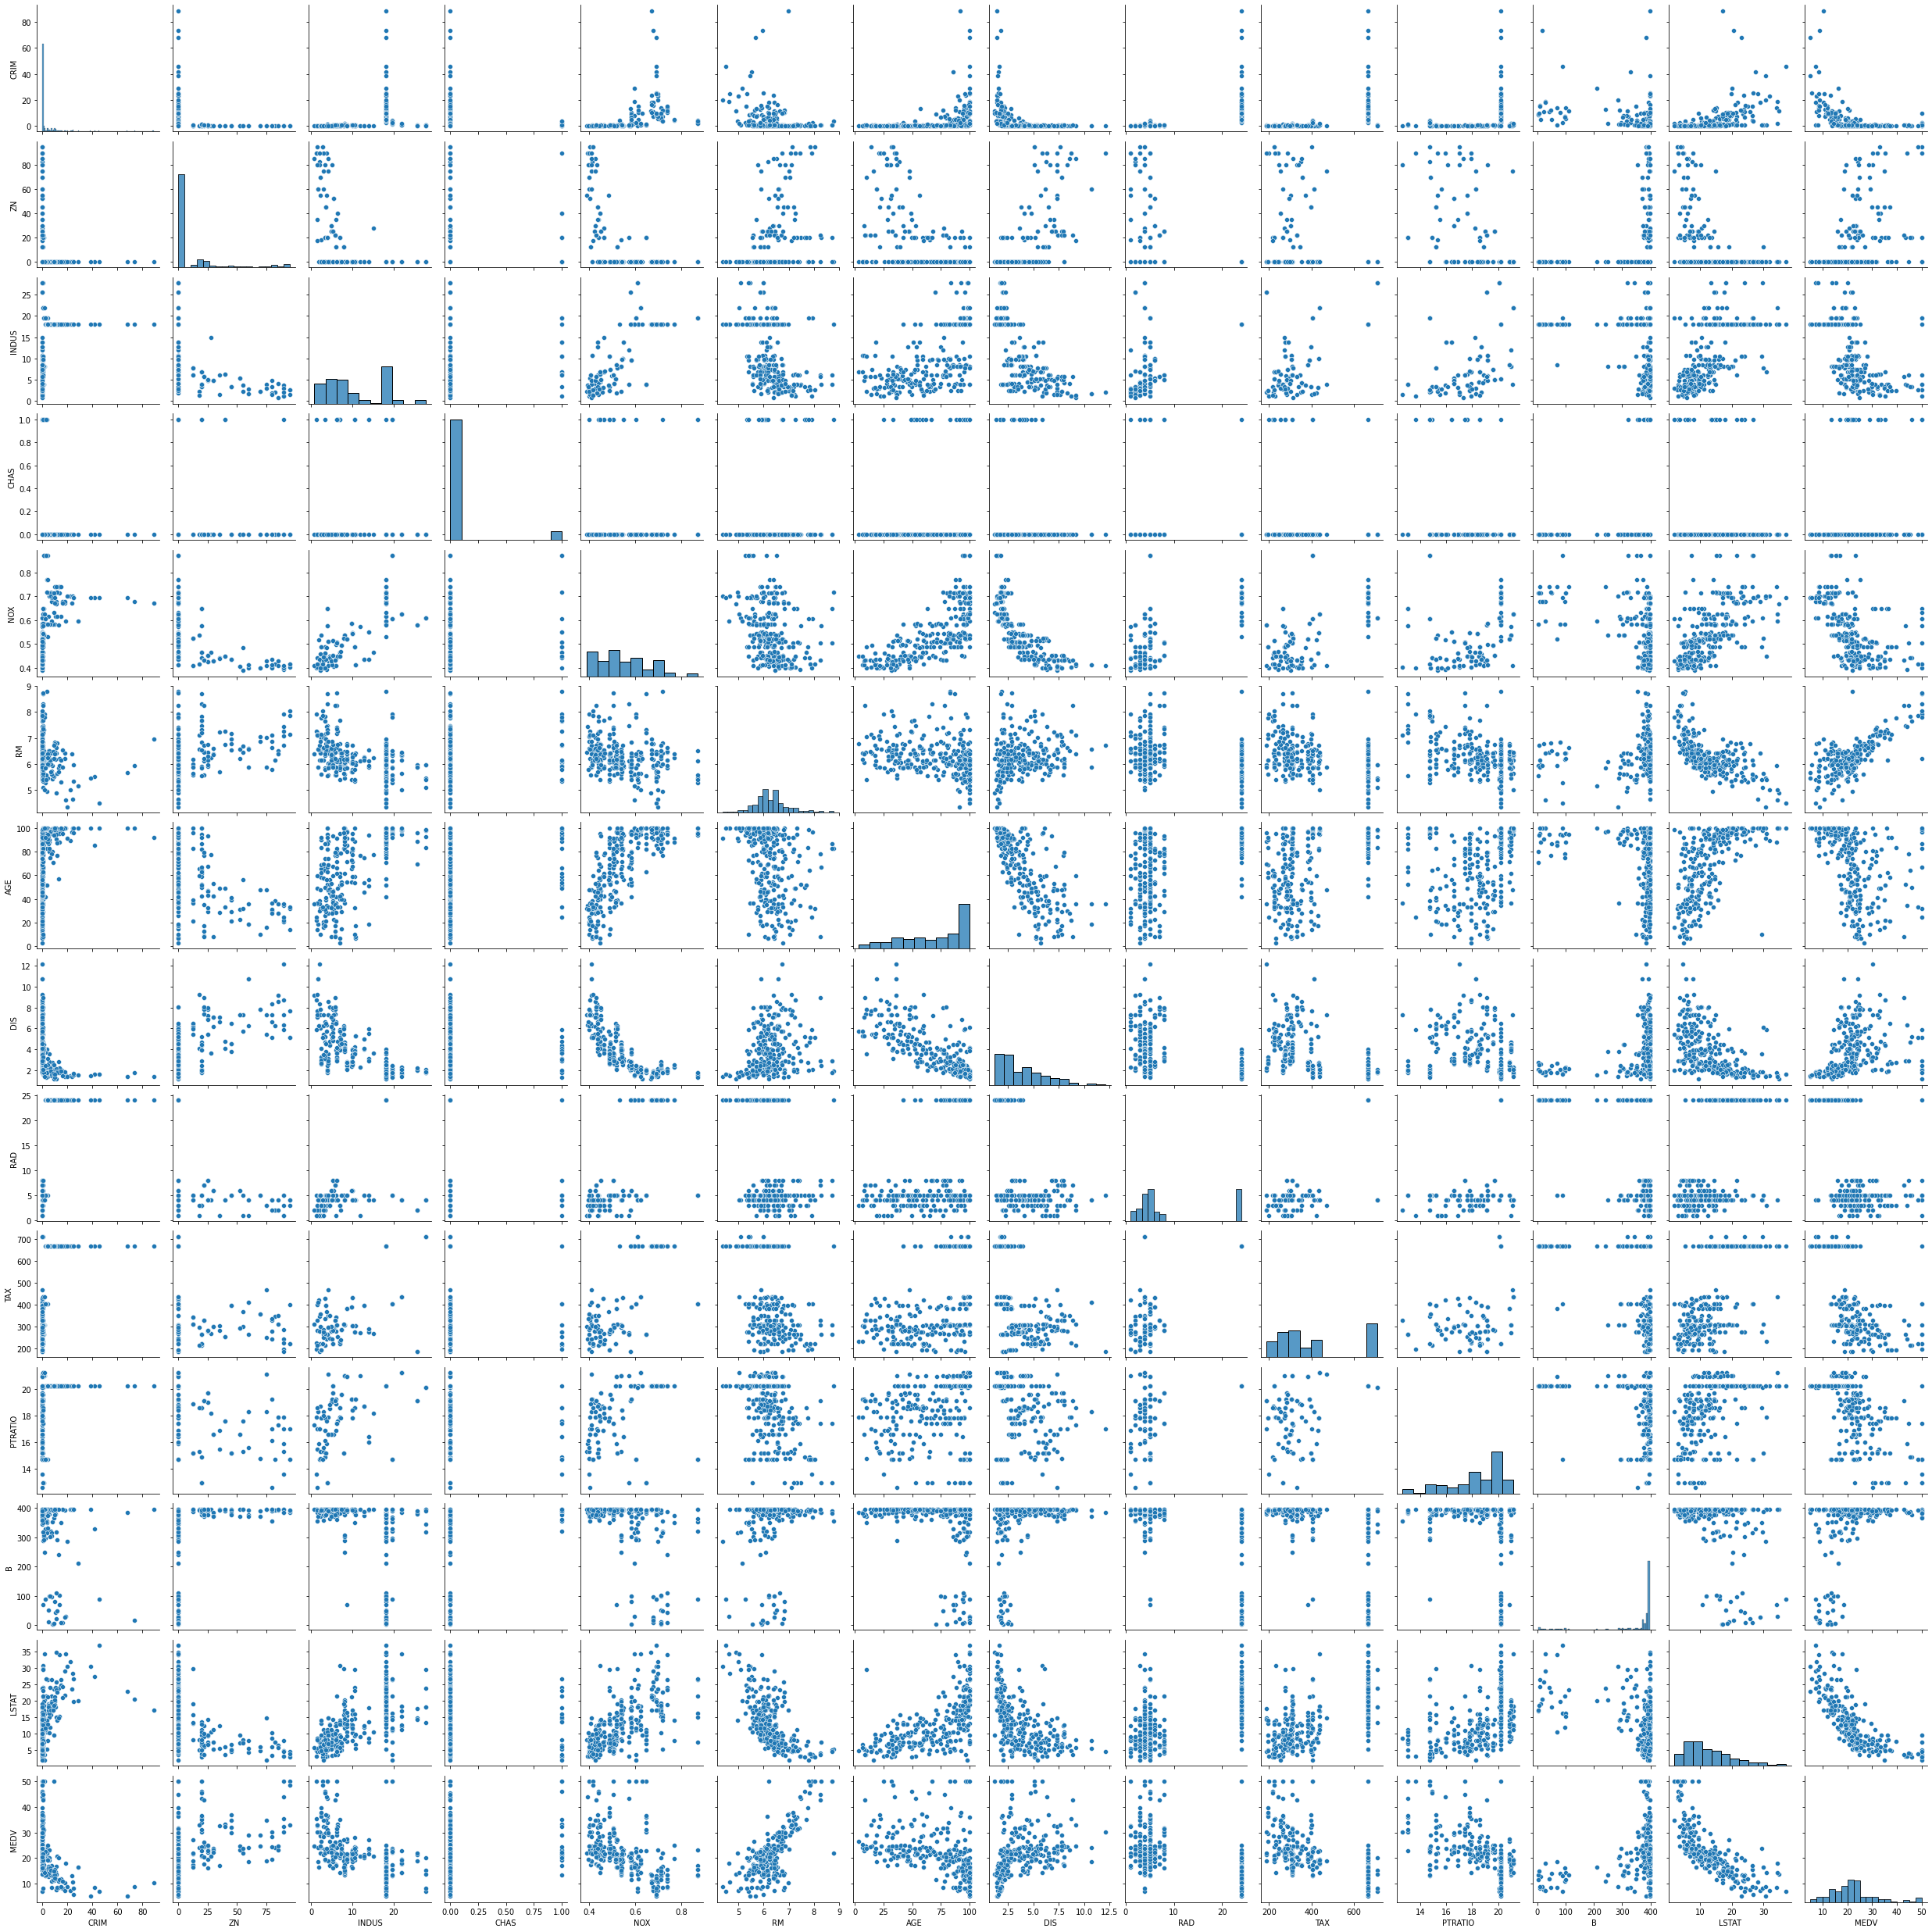

In [9]:
sns.pairplot(train)

#### **Choosing what variables may impact the housing price in Boston and creating the models**

From the correlation matrix and the pair plot these are the following variables that may seem to have the most impact on housing prices (MEDV);
- RM - average number of rooms per dwelling

- LSTAT- % lower status of the population

- CRIM - per capita crime rate by town

- TAX - full-value property-tax rate per $10,000

From here, we make a few models - one with no interaction terms and a couple other models with different interaction terms.

In [10]:
X = train[['RM','LSTAT', 'CRIM','TAX']]
y = train['MEDV'] 
## fit a OLS model with intercept on TV and Radio 
X = sm.add_constant(X) 
model_1 = ols('MEDV ~ RM + LSTAT + CRIM + TAX', data=train).fit() 
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     163.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.45e-70
Time:                        12:08:46   Log-Likelihood:                -820.44
No. Observations:                 272   AIC:                             1651.
Df Residuals:                     267   BIC:                             1669.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8755      4.213     -2.582      0.010     -19.170      -2.581
RM             6.7209      0.588     11.428      0.000       5.563       7.879
LSTAT         -0.2671      0.068     -3.913      0.000      -0.401      -0.133
CRIM          -0.0622      0.037     -1.702      0.090      -0.134       0.010
TAX           -0.0139      0.002     -5.609      0.000      -0.019      -0.009
==============================================================================
Omnibus:                      107.589   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.896
Skew:                           1.540   Prob(JB):                    2.13e-118
Kurtosis:                       9.191   Cond. No.                     6.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
model_2 = ols('MEDV ~ RM + LSTAT + CRIM + TAX + TAX:RM', data = train).fit() 
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     206.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           2.06e-89
Time:                        12:08:46   Log-Likelihood:                -773.22
No. Observations:                 272   AIC:                             1558.
Df Residuals:                     266   BIC:                             1580.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -66.6978      6.388    -10.441      0.000     -79.275     -54.120
RM            15.6042      0.980     15.926      0.000      13.675      17.533
LSTAT         -0.2827      0.058     -4.915      0.000      -0.396      -0.169
CRIM          -0.1063      0.031     -3.420      0.001      -0.168      -0.045
TAX            0.1280      0.014      9.369      0.000       0.101       0.155
TAX:RM        -0.0227      0.002    -10.508      0.000      -0.027      -0.018
==============================================================================
Omnibus:                      176.873   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2346.169
Skew:                           2.388   Prob(JB):                         0.00
Kurtosis:                      16.572   Cond. No.                     6.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model_3 = ols('MEDV ~ RM + LSTAT + CRIM + TAX + LSTAT:RM', data = train).fit() 
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     227.8
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           6.45e-94
Time:                        12:08:46   Log-Likelihood:                -762.58
No. Observations:                 272   AIC:                             1537.
Df Residuals:                     266   BIC:                             1559.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -39.4441      4.175     -9.448      0.000     -47.664     -31.224
RM            11.2921      0.612     18.439      0.000      10.086      12.498
LSTAT          2.5166      0.241     10.450      0.000       2.042       2.991
CRIM          -0.1012      0.030     -3.398      0.001      -0.160      -0.043
TAX           -0.0092      0.002     -4.501      0.000      -0.013      -0.005
LSTAT:RM      -0.4854      0.041    -11.876      0.000      -0.566      -0.405
==============================================================================
Omnibus:                      136.829   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2889.857
Skew:                           1.499   Prob(JB):                         0.00
Kurtosis:                      18.684   Cond. No.                     7.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Using this as reference : https://www.rose-hulman.edu/class/ma/inlow/Math485/ftests.pdf

We compare the models and see which one is better.

In the context of the reference, argument 1 is the full model and argument 2 is the reduced model.

We see that model 2 performs worse than models 1 and 3. Model 3 performs the best. Let's fine tune that model

In [13]:
anovaResults = anova_lm(model_1, model_2)
print(anovaResults)

   df_resid          ssr  df_diff      ss_diff           F        Pr(>F)
0     267.0  6637.895867      0.0          NaN         NaN           NaN
1     266.0  4690.691711      1.0  1947.204156  110.422159  7.871161e-22


In [14]:
anovaResults = anova_lm(model_1, model_3)
print(anovaResults)

   df_resid          ssr  df_diff      ss_diff           F        Pr(>F)
0     267.0  6637.895867      0.0          NaN         NaN           NaN
1     266.0  4337.908740      1.0  2299.987128  141.034912  2.210475e-26


In [15]:
anovaResults = anova_lm(model_2,model_3)
print(anovaResults)

   df_resid          ssr  df_diff     ss_diff    F  Pr(>F)
0     266.0  4690.691711      0.0         NaN  NaN     NaN
1     266.0  4337.908740     -0.0  352.782971 -inf     NaN


In [16]:
model_3.params

Intercept   -39.444099
RM           11.292061
LSTAT         2.516588
CRIM         -0.101239
TAX          -0.009191
LSTAT:RM     -0.485437
dtype: float64

#### Not needed but practice of getting the values of MEDV from training

In [17]:
train_actual_3 = train['MEDV']
train_actual_3

109    19.4
268    43.5
456    12.7
101    26.5
139    17.8
       ... 
141    14.4
454    14.9
247    20.5
403     8.3
178    29.9
Name: MEDV, Length: 272, dtype: float64

In [18]:
train_pred_3 = model_3.predict(train)
print(train_pred_3)

109    19.451014
268    38.919915
456    14.135967
101    27.640801
139    17.277674
         ...    
141    15.808227
454    15.422375
247    22.673914
403    10.742859
178    29.662564
Length: 272, dtype: float64


### **We now get the MEDV values from validation dataset for the actual values and then we predict the MEDV validation values using the model.**

In [19]:
valid_actual_3 = validate['MEDV']
valid_actual_3

29     21.0
358    22.7
65     23.5
480    23.0
314    23.8
       ... 
222    27.5
306    33.4
160    27.0
220    26.7
202    42.3
Name: MEDV, Length: 79, dtype: float64

In [20]:
# The start of validation. Loss function
validation_pred_3 = model_3.predict(validate)
print(validation_pred_3)

29     24.331710
358    17.840015
65     25.974911
480    18.814730
314    25.649848
         ...    
222    27.179356
306    35.272660
160    24.452540
220    27.860883
202    39.625357
Length: 79, dtype: float64


In [21]:
validate

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
29,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4,307,21.0,380.23,11.98,21.0
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67,23.5
480,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24,666,20.2,396.90,10.74,23.0
314,0.36920,0.0,9.90,0.0,0.544,6.567,87.3,3.6023,4,304,18.4,395.69,9.28,23.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0.62356,0.0,6.20,1.0,0.507,6.879,77.7,3.2721,8,307,17.4,390.39,9.93,27.5
306,0.07503,33.0,2.18,0.0,0.472,7.420,71.9,3.0992,7,222,18.4,396.90,6.47,33.4
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8,307,17.4,391.70,9.71,26.7


### **The purpose of getting actual and predicted values...**

We calculate the Root-Mean Square Error to measure the accuracy of the model. We can use this to determine how successful the model was.

In [22]:
def mean_sq_error(act, pred):
    diff = act - pred
    diff_sq = diff ** 2
    mean_diff_sq = diff_sq.mean()

    return mean_diff_sq

#### Training MSE and RSME

In [23]:
mean_sq_error(train_actual_3, train_pred_3)

15.948193896941705

In [24]:
rmse_train = mean_sq_error(train_actual_3, train_pred_3) ** .5
rmse_train

3.993518986676

#### Validation MSE and RSME

In [25]:
mean_sq_error(valid_actual_3, validation_pred_3)

16.079195101940098

In [26]:
rmse_validate = mean_sq_error(valid_actual_3, validation_pred_3) ** .5
rmse_validate

4.00988716823056

#### **Calculate RMSE for model 1 and model 2. This helps build a bigger case FOR model 3**

We already believe that Model 3 is better, but we need to show WHY

In [27]:
validation_pred_1 = model_1.predict(validate)
print(validation_pred_1)

29     26.457337
358    17.671282
65     25.472809
480    18.603115
314    26.540396
         ...    
222    28.406247
306    34.180112
160    23.989366
220    28.965434
202    34.609304
Length: 79, dtype: float64


In [28]:
rmse_validate_1 = mean_sq_error(valid_actual_3, validation_pred_1) ** .5
rmse_validate_1

4.948828543448581

In [29]:
validation_pred_2 = model_2.predict(validate)

rmse_validate_2 = mean_sq_error(valid_actual_3, validation_pred_2) ** .5
print("The RSME of Model 2 is ", rmse_validate_2)

The RSME of Model 2 is  5.069070987105893


## **PLOTS**

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

#### **Fitted vs. Residuals Plot for Heteroscedasticity**

This plot shows violation of the constant variance assumption. There does not to seem to be heteroscedacisty with any of the three models.

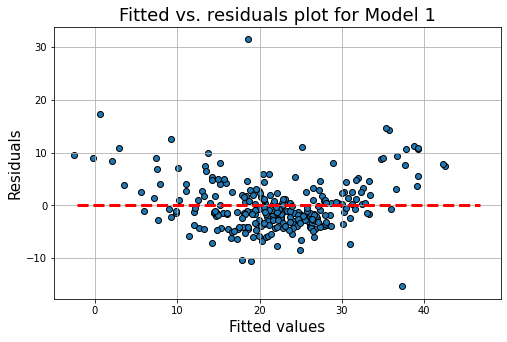

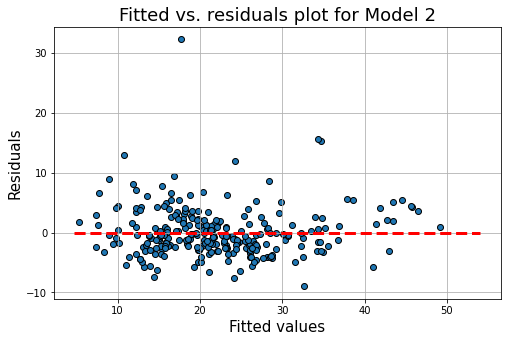

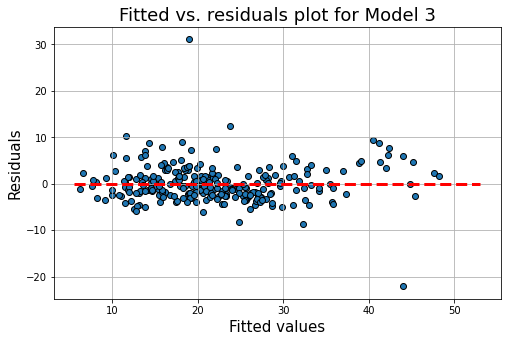

In [31]:
models = [model_1, model_2,model_3]
for model in models:
    plt.figure(figsize=(8,5))
    p=plt.scatter(x=model.fittedvalues,y=model.resid,edgecolor='k')
    xmin = min(model.fittedvalues)
    xmax = max(model.fittedvalues)
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel("Fitted values",fontsize=15)
    plt.ylabel("Residuals",fontsize=15)
    
    model_name = models.index(model) + 1
    plt.title(f"Fitted vs. residuals plot for Model {model_name}", fontsize=18)
    plt.grid(True)
    plt.show()

### Normalized Residuals Histogram

Model 3 has the most normally distributed residuals.

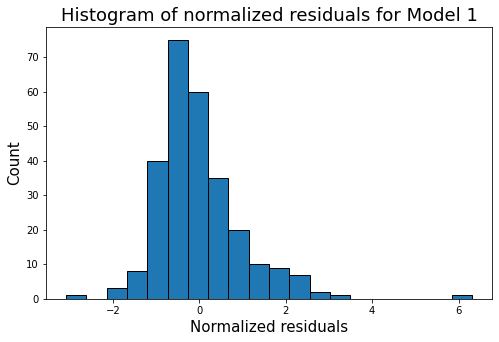

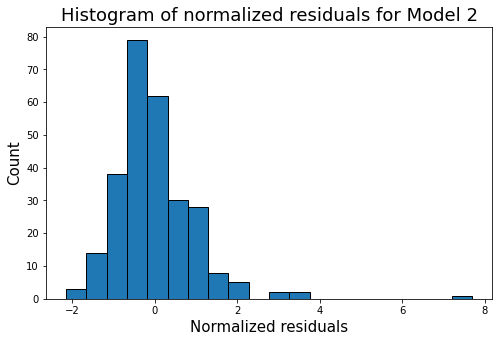

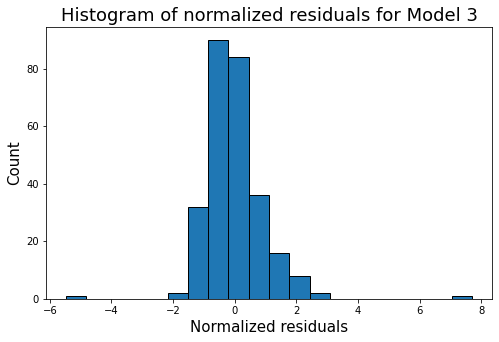

In [32]:
for model in models:
    plt.figure(figsize=(8,5))
    plt.hist(model.resid_pearson,bins=20,edgecolor='k')
    plt.ylabel('Count',fontsize=15)
    plt.xlabel('Normalized residuals',fontsize=15)
    model_name = models.index(model) + 1
    plt.title(f"Histogram of normalized residuals for Model {model_name}",fontsize=18)
    plt.show()

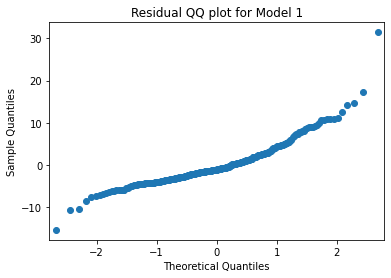

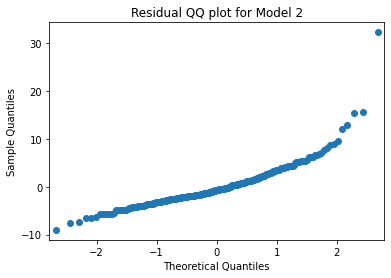

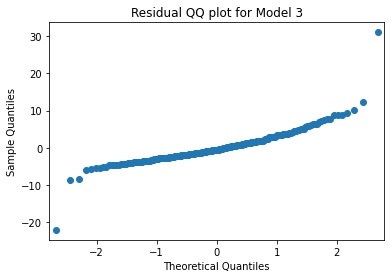

In [33]:
for model in models:
    res = model.resid # residuals
    fig = sm.qqplot(res)
    model_name = models.index(model) + 1
    plt.title(f"Residual QQ plot for Model {model_name}")
    plt.show()

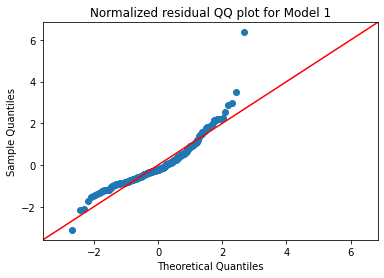

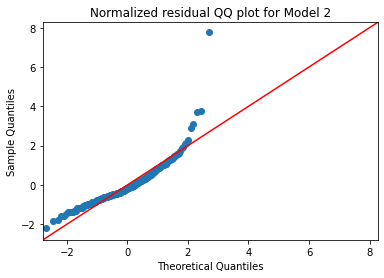

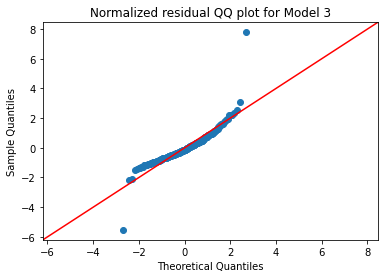

In [34]:
for model in models:
    res = model.resid_pearson # residuals
    fig = sm.qqplot(res, line='45',fit='True')
    model_name = models.index(model) + 1
    plt.title(f"Normalized residual QQ plot for Model {model_name}")
    plt.show()